In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('./data/amazon_sales_data 2025.csv')
sales.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [4]:
sales.shape

(250, 11)

In [5]:
sales.duplicated().sum()

0

In [6]:
sales.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [7]:
sales.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [8]:
sales['Product'].unique()
sales['Product'].value_counts()

Product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64

In [9]:
sales['Customer Location'].value_counts()

Customer Location
Houston          32
Miami            31
Dallas           29
New York         26
Denver           26
Boston           26
Seattle          22
Chicago          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64

In [10]:
# Ensure proper column types
sales['Category'] = sales['Category'].astype(str)
sales['Product'] = sales['Product'].astype(str)
sales['Customer Location'] = sales['Customer Location'].astype(str)
sales['Payment Method'] = sales['Payment Method'].astype(str)
sales['Status'] = sales['Status'].astype(str)
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales = sales.dropna(subset=['Date'])

C:\Users\greyc\AppData\Local\Temp\ipykernel_1788\3584174786.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')


In [11]:
sales.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

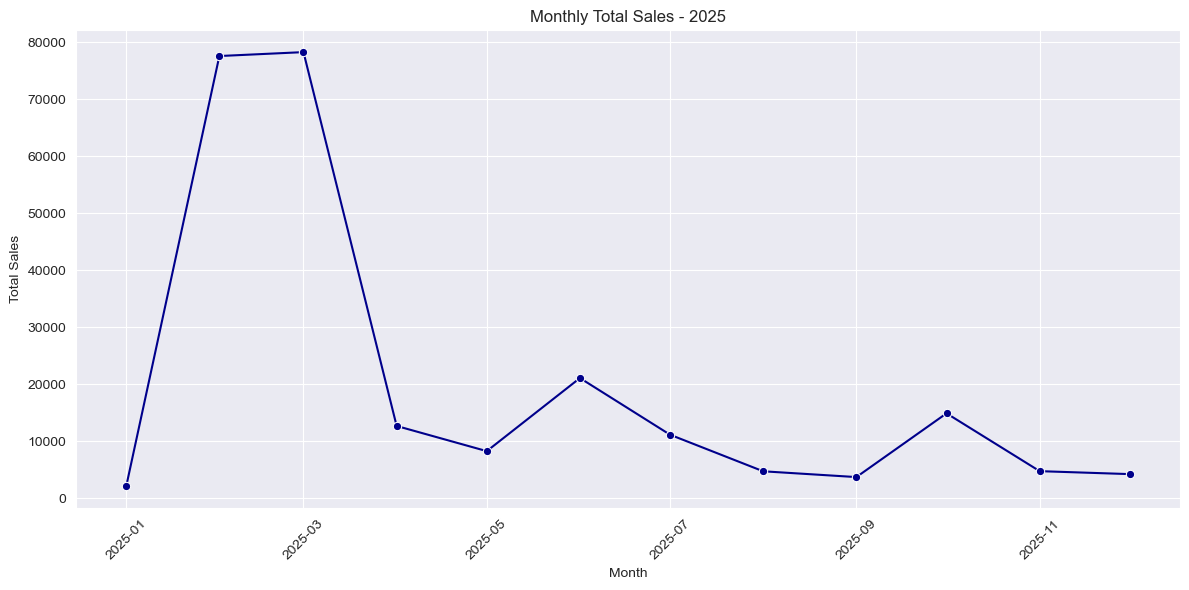

In [24]:
# Step 3: Group by month and sum sales
monthly_sales = sales.groupby(sales['Date'].dt.to_period('M'))['Total Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Total Sales', marker='o', color='darkblue')
plt.title('Monthly Total Sales - 2025')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

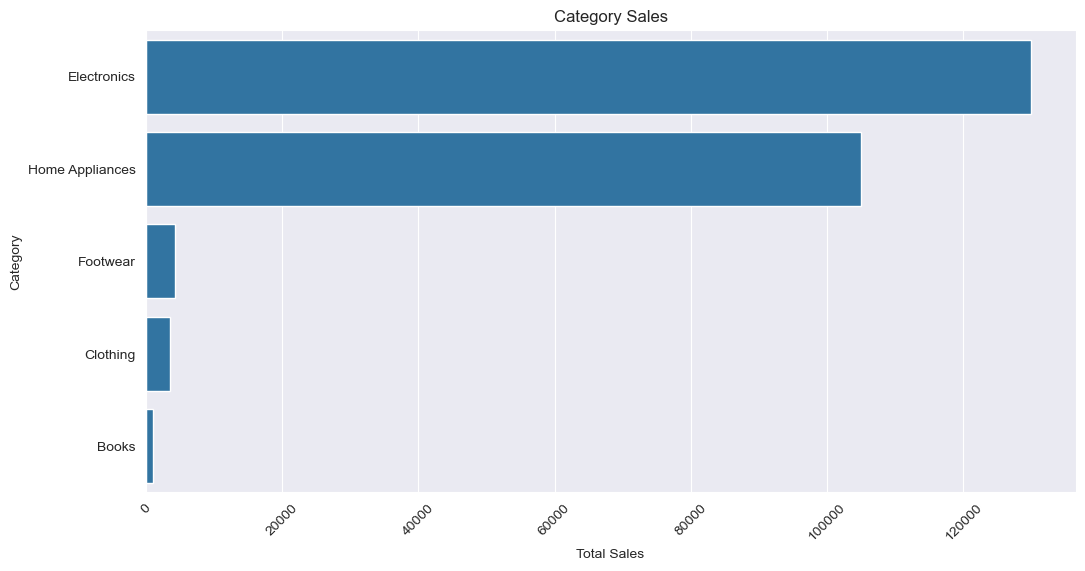

In [26]:
category_sales = sales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Category Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Payment Counts')

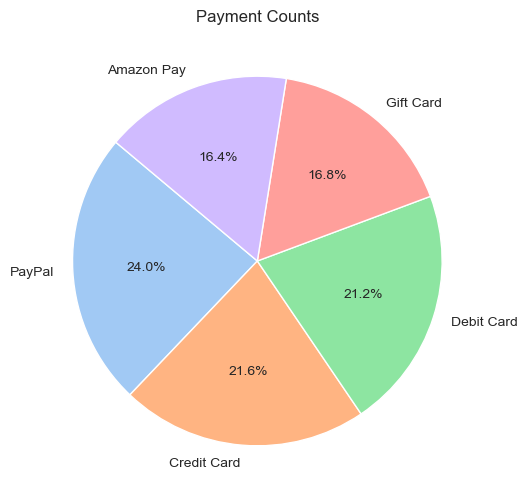

In [31]:
payment_counts = sales['Payment Method'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Payment Counts')

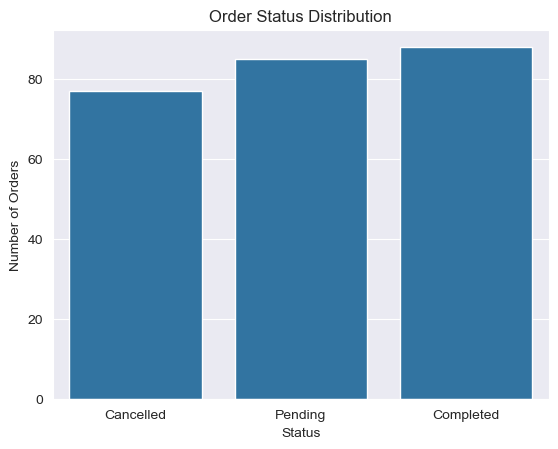

In [15]:
sns.countplot(data=sales, x='Status')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()


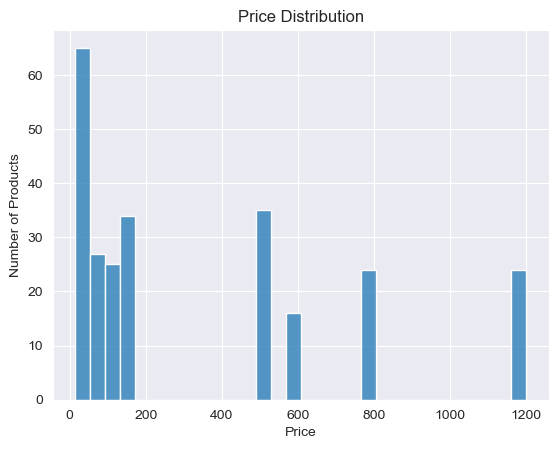

In [16]:
sns.histplot(sales['Price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()


In [17]:
sales.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


C:\Users\greyc\AppData\Local\Temp\ipykernel_1788\971481607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_r')


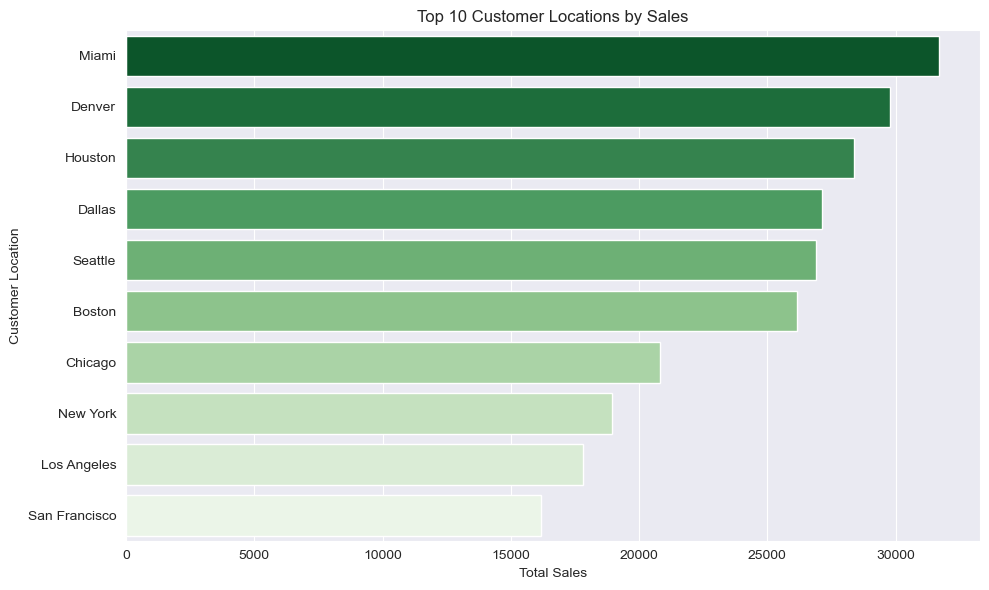

In [33]:
top_locations = sales.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_r')
plt.title('Top 10 Customer Locations by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()

In [34]:
denverSales = sales[(sales['Customer Location'] == 'Denver') & (sales['Status'] == 'Completed')]
denverSales.head()

miamiSales = sales[(sales['Customer Location'] == 'Miami') & (sales['Status'] == 'Completed')]

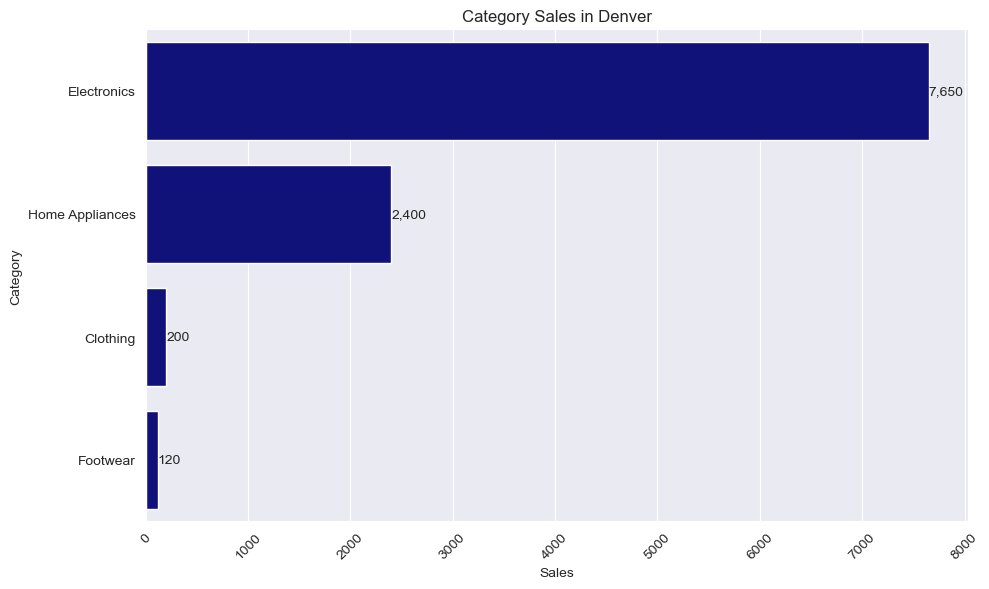

In [42]:
category_sales = denverSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_sales.values, y=category_sales.index, color='darkblue')

# Add labels on bars
for i, value in enumerate(category_sales.values):
    plt.text(value + 0.5, i, f'{value:,.0f}', va='center')  # Add commas and remove decimals

plt.title('Category Sales in Denver')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
denverSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

Category
Electronics        7650
Home Appliances    2400
Clothing            200
Footwear            120
Name: Total Sales, dtype: int64

In [22]:
miamiSales.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

Category
Electronics        5800
Home Appliances    5400
Footwear            480
Name: Total Sales, dtype: int64

# Predictive Modeling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [44]:
# Step 1: Convert 'Date' to datetime if not already
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%y', errors='coerce')

# Step 2: Create new date features
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day
sales['Weekday'] = sales['Date'].dt.day_name()

In [45]:
ml_df = sales[['Price', 'Quantity', 'Month', 'Day', 'Year']]
target = sales['Total Sales']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(ml_df, target, test_size=0.2, random_state=537)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [49]:
for name, model in models.items():
    if name in ['Support Vector Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} -> R2 Score: {r2:.2%} | RMSE: {rmse:.2f}")

Linear Regression -> R2 Score: 87.43% | RMSE: 494.62
Decision Tree -> R2 Score: 98.68% | RMSE: 160.00
Random Forest -> R2 Score: 98.67% | RMSE: 160.65
Support Vector Regression -> R2 Score: -25.70% | RMSE: 1564.32
K-Nearest Neighbors -> R2 Score: 94.79% | RMSE: 318.43


In [50]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
r2_scores = [87.43, 98.68, 98.67, -25.70, 94.79]

C:\Users\greyc\AppData\Local\Temp\ipykernel_1788\2637244414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_scores, y=models, palette='Blues_d')


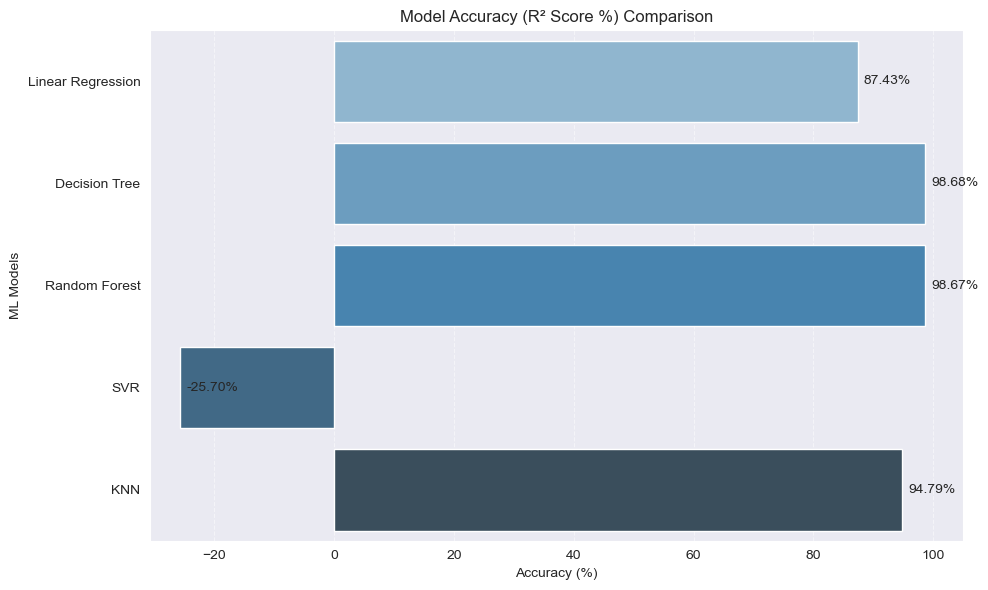

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=models, palette='Blues_d')

# Add score labels to the bars
for i, score in enumerate(r2_scores):
    plt.text(score + 1, i, f"{score:.2f}%", va='center', fontsize=10)

plt.title('Model Accuracy (R² Score %) Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('ML Models')
plt.xlim(min(r2_scores) - 5, 105)  # Extending x-axis for visibility
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()